<a href="https://colab.research.google.com/github/maavistar/CF-microbiome/blob/master/CF_Microbiome_Analysis_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#Eric's imports
import tensorflow as tf
from sklearn.model_selection import train_test_split
from scipy.stats import linregress
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error
from scipy.stats import linregress

In [ ]:
!gdown --id 1aU9-VffFEZrcB5yG4QzqYJ-4QfW59X2E # sample info
!gdown --id 1Jmp4PvgPy8YjaiOcFa7baY-3tkCZO9Vs # taxonomic data
!gdown --id 1jeHFeaApOIBOjr71TvnxbYfvzEU5ZJ3v # count matrix
!gdown --id 1iNQpFfidd5giZ1Hg7ItrVPvayNYN9SG9 # clustered data
!gdown --id 1RnkL8i3PkqfseIZHLFSuSwRuLeSc4Bnl # clustered names

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1aU9-VffFEZrcB5yG4QzqYJ-4QfW59X2E
To: /content/sample_info.txt
100% 34.7k/34.7k [00:00<00:00, 26.1MB/s]
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Jmp4PvgPy8YjaiOcFa7baY-3tkCZO9Vs
To: /content/taxonomic_data.txt.taxonomy
100% 7.03M/7.03M [00:00<00:00, 89.4MB/s]
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://dr

In [ ]:
sample_data = pd.read_table("sample_info.txt")
taxonomic_data = pd.read_table("taxonomic_data.txt.taxonomy", header=None)
count_matrix = pd.read_table("count_table.txt.count_table")
clustered_data = pd.read_table("clustered_names.txt.names", header=None)

In [ ]:
count_matrix

,Representative_Sequence,total,13507.RTSF.NTC1,13507.RTSF.NTC2,13507.RTSF.NTC3,13507.SD200.N,13507.SD200.T,13507.SD231.N,13507.SD231.T,13507.SD239.N,...,13507.SH036.N,13507.SH036.T,13507.SH037.N,13507.SH037.T,13507.SH038.N,13507.SH038.T,13507.SH039.N,13507.SH039.T,13507.SH043.N,13507.SH043.T
0,13507.RTSF.NTC1_0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,13507.RTSF.NTC1_1,15,15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,13507.RTSF.NTC1_2,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,13507.RTSF.NTC1_3,7,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13507.RTSF.NTC1_4,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276863,13507.SH043.T_18243,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
276864,13507.SH043.T_18245,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
276865,13507.SH043.T_18247,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
276866,13507.SH043.T_18248,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Cleaning Up Taxonomic Data

In [ ]:
taxonomic_data[1][0]

'Bacteria(98);Bacteria_unclassified(98);Bacteria_unclassified(98);Bacteria_unclassified(98);Bacteria_unclassified(98);Bacteria_unclassified(98);'

In [ ]:
def remove_bacteria(taxonomy_str):
  new_tax = taxonomy_str.split(";")
  new_tax = new_tax[1:]
  return new_tax

taxonomic_data.columns = ["rep_seq", "bact_comp"] #columns were previously named [0,1] for whatever reason

taxonomic_data["new_bact_comp"] = taxonomic_data["bact_comp"].apply(remove_bacteria) #We can apply function to bact_comp column, create new col which drops first string..? Who cares
print(taxonomic_data)
#It looks like the column "new_bact_comp" gets used throughout the notebook to add new columns to taxonomic_data

                   rep_seq                                          bact_comp  \
0       13507.RTSF.NTC1_35  Bacteria(98);Bacteria_unclassified(98);Bacteri...   
1       13507.RTSF.NTC1_16  Bacteria(100);"Proteobacteria"(93);Deltaproteo...   
2      13507.RTSF.NTC1_301  Bacteria(100);"Verrucomicrobia"(100);Spartobac...   
3       13507.RTSF.NTC1_82  Bacteria(100);"Bacteroidetes"(100);"Sphingobac...   
4      13507.RTSF.NTC1_312  Bacteria(100);"Bacteroidetes"(100);"Sphingobac...   
...                    ...                                                ...   
45944  13507.SH043.T_15365  Bacteria(97);Firmicutes(90);Clostridia(86);Clo...   
45945  13507.SH043.T_15355  Bacteria(99);"Bacteroidetes"(99);"Bacteroidia"...   
45946  13507.SH043.T_15334  Bacteria(100);"Bacteroidetes"(99);"Bacteroidia...   
45947  13507.SH043.T_17263  Bacteria(100);"Bacteroidetes"(99);"Bacteroidia...   
45948  13507.SH043.T_17210  Bacteria(100);"Proteobacteria"(100);Gammaprote...   

                           

Below, we further break down the info in "new_bact_comp" column to identify genus, family, and other info for each sample!

In [ ]:
def extract_genus(tax_list):
  genus = tax_list[-2].split("(")[0]
  return genus

taxonomic_data["genus"] = taxonomic_data["new_bact_comp"].apply(extract_genus)

In [ ]:
def extract_family(tax_list):
  family = tax_list[-3].split("(")[0]
  return family

taxonomic_data["family"] = taxonomic_data["new_bact_comp"].apply(extract_family)

In [ ]:
def extract_order(tax_list):
  order = tax_list[-4].split("(")[0]
  return order

taxonomic_data["order"] = taxonomic_data["new_bact_comp"].apply(extract_order)

In [ ]:
def extract_class(tax_list):
  cl = tax_list[-5].split("(")[0]
  return cl

taxonomic_data["clas"] = taxonomic_data["new_bact_comp"].apply(extract_class)

In [ ]:
def extract_phylum(tax_list):
  phylum = tax_list[-6].split("(")[0]
  return phylum

taxonomic_data["phylum"] = taxonomic_data["new_bact_comp"].apply(extract_phylum)

In [ ]:
def extract_patient_id(tax_list):
  patient_id = tax_list.split("_")[0]
  return patient_id

taxonomic_data["patient_id"] = taxonomic_data["rep_seq"].apply(extract_patient_id)
first_column = taxonomic_data.pop("patient_id")
taxonomic_data.insert(0,"patient_id",first_column)

What is about to happen with count_matrix here?

In [ ]:
#count_matrix.Representative_Sequence

In [ ]:
#count_matrix.sort_values("total").head(5)

In [ ]:
count_matrix.sort_values("total").tail(5) #Sort ascending "total counts", show last 5 (top 5 most counts!)
count_matrix.index=count_matrix.Representative_Sequence #Instead of having numeric row index, use representative sequence instead
count_matrix.drop(["Representative_Sequence", "total"], inplace=True, axis=1) #Next, drop the rep_sequence column and total count column

In [ ]:
count_matrix.tail()

,13507.RTSF.NTC1,13507.RTSF.NTC2,13507.RTSF.NTC3,13507.SD200.N,13507.SD200.T,13507.SD231.N,13507.SD231.T,13507.SD239.N,13507.SD239.T,13507.SD262.N,...,13507.SH036.N,13507.SH036.T,13507.SH037.N,13507.SH037.T,13507.SH038.N,13507.SH038.T,13507.SH039.N,13507.SH039.T,13507.SH043.N,13507.SH043.T
Representative_Sequence,,,,,,,,,,,,,,,,,,,,,
13507.SH043.T_18243,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
13507.SH043.T_18245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13507.SH043.T_18247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13507.SH043.T_18248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13507.SH043.T_18249,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Formatting Dataframes (transformation into total counts)

In [ ]:
# There's a whole count matrix (count of every single possible raw sequence).
# However, taxonomy has only been assigned to the representative sequences. So these raw sequences are aggregated together into a "cluster"

cluster_dict = dict() #create dictionary

for i in range(len(clustered_data)):
  rep_seq = clustered_data.iloc[i][0] #representative sequence for the cluster
  list_of_seqs = clustered_data.iloc[i][1].split(',') #sequences that belong to the cluster
  for seq in list_of_seqs:
    cluster_dict[seq] = rep_seq #dictionary where the representative sequence for all other sequences

aggregated_count_matrix = count_matrix.groupby(cluster_dict, axis=0).sum()

# only sequence ids that are in both datasets
taxonomic_data.index = taxonomic_data.rep_seq
taxonomic_data.loc[aggregated_count_matrix.index]

# same order of sample names in count matrix and sample data
sample_data.index = sample_data.sample_name
aggregated_count_matrix = aggregated_count_matrix[sample_data.index]

In [ ]:
aggregated_count_matrix

,13507.RTSF.NTC1,13507.RTSF.NTC2,13507.RTSF.NTC3,13507.SD200.N,13507.SD200.T,13507.SD231.N,13507.SD231.T,13507.SD239.N,13507.SD239.T,13507.SD262.N,...,13507.SH036.N,13507.SH036.T,13507.SH037.N,13507.SH037.T,13507.SH038.N,13507.SH038.T,13507.SH039.N,13507.SH039.T,13507.SH043.N,13507.SH043.T
Representative_Sequence,,,,,,,,,,,,,,,,,,,,,
13507.RTSF.NTC1_1,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13507.RTSF.NTC1_101,56,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13507.RTSF.NTC1_1018,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13507.RTSF.NTC1_1034,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13507.RTSF.NTC1_105,57,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13507.SH043.T_9857,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13507.SH043.T_9858,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
13507.SH043.T_9904,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


**Results/Analysis**

*FEV1 Correlation with bacteria clusters*

In [ ]:
# calculating significance value

seq_list = []
count = 0

for index in range(len(clustered_data)):
  seq_list = clustered_data[1][index].split(",")
  if len(seq_list) >= 300:
    count += 1
  seq_list = []

print(count)
a_level = 0.05/count
print(a_level)

124
0.0004032258064516129


5.484755493682767e-06
13507.SD239.T_13466
0.6203459931321331


Text(0, 0.5, 'Bacetria Counts')

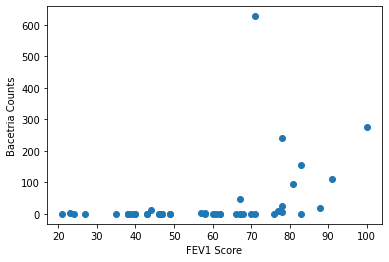

In [ ]:
from scipy import stats

fev1 = pd.to_numeric(sample_data.fev1, errors='coerce')
pvalues = []
bacteria_names = []
corr_values = []
for bact_name in aggregated_count_matrix.index:
  bacteria_counts = aggregated_count_matrix.loc[bact_name]
  result = stats.spearmanr(fev1, bacteria_counts, nan_policy='omit')
  if result.pvalue < a_level:
    pvalues.append(result.pvalue)
    bacteria_names.append(bact_name)
    corr_values.append(result.correlation)

min_index = np.argmin(pvalues)
print(pvalues[min_index])
print(bacteria_names[min_index])
print(corr_values[min_index])

bacteria_counts = aggregated_count_matrix.loc[bacteria_names[min_index]] #okay, why does this make sense?
plt.scatter(fev1, bacteria_counts)
plt.xlabel("FEV1 Score")
plt.ylabel("Bacetria Counts")

#aggregated_count_matrix has representative sequence as rows, the columns are the patients, and the number == the number of times that representative sequence appeared in patient

In [ ]:
#Gather X_train, Y_train, X_test, Y_test based on bacetia that had statistically significant correlation to FEV1 score from previous step:
bc_all_sig = aggregated_count_matrix.loc[bacteria_names] #The number of counts per patient per representative sequence (input/feature variable)

#What is FEV1 score? This is what we want to predict (response variable)
clean_idx = np.where(np.isnan(fev1) == False)[0]
clean_fev1 = fev1[clean_idx].values
patient_names = bc_all_sig.columns
keep_cols = patient_names[clean_idx]

#Drop NaNs, convert to np.array and transpose so rows == samples
bcas_nn = bc_all_sig[keep_cols].values.T

X = bcas_nn
y = clean_fev1


In [ ]:
X

array([[  0,   0,   0,   0,   0],
       [172,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0],
       [  1,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0],
       [  0,  10,   0,   0,   0],
       [  0,   0,   8,   0,   0],
       [  0,   0,  30,   0,   0],
       [  0,   0,   1,   0,   0],
       [  0,   0,   0,   0,   0],
       [  3,   0,   0,   0,   0],
       [ 45,  25, 135,   0,   0],
       [  2,  46,   0,   0,   0],
       [ 54, 240, 406,  91,   0],
       [  0, 627,   0,   0,   0],
       [  0,   0,   0,   0,   0],
       [  9,  14,   0,   0,   0],
       [ 32, 111, 210,   0,   0],
       [  0,   0,   0,   0,   0],
       [  0,   0,   2,   0,   0],
       [  0,   3,   0,   0,   0],
       [ 11,   1,   1,   0,   0],
       [  6,   4, 205,  12,   0],
       [ 82, 156, 729,  20,   4],
       [  0,   0,   0,   0,   0],
       [  7,   0,   0,   0,   0],
       [166,  96,  54,  16,  13],
       [646, 275, 267,  15,  49],
       [  0,   0,   0,   0,   0],
       [  0,  

In [ ]:
#Throw out low-count data

row_sum = X.sum(axis = 1)
keep_these = np.where(row_sum > 3)[0]
X = X[keep_these]
y = y[keep_these]
row_sum = row_sum[keep_these]
np.shape(X)

(19, 5)

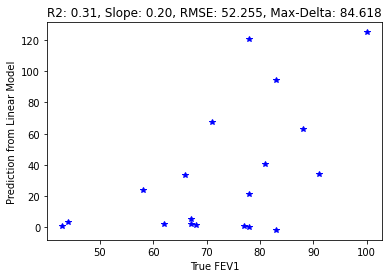

In [ ]:

#Firstly, how does a linear model work? LSTSQ!

#lstsq fit, pinv(x)*Y

#The number of counts in highly correlated bacteria is sometimes low, toss these samples also.

w = np.linalg.pinv(X)@y

y_pred = X@w

#What metrics do we want to look at? RMSE? Max-delta?

rmse = np.sqrt(mean_squared_error(y,y_pred))
max_delta = np.max(np.abs(y-y_pred))

reg = linregress(y_pred, y)
r2 = reg.rvalue**2
slope = reg.slope
offset = reg.intercept



plt.plot(y,y_pred, "*", color="blue")
plt.xlabel("True FEV1")
plt.ylabel("Prediction from Linear Model")
stats = f"R2: {r2 :.2f}, Slope: {slope :.2f}, RMSE: {rmse :.3f}, Max-Delta: {max_delta :.3f}"
plt.title(f"{stats}")
plt.show()


Performed poorly, but this is expected since we can see the relationship between FEV1 and counts is non-linear.

Let's just throw a NN at it.

In [ ]:
model = keras.Sequential(
    [
        layers.Dense(30, input_shape = (5,), activation="relu", name="layer1"),
        layers.Dense(60, input_shape = (30, ) ,activation="relu", name="layer2"),
        layers.Dense(120, input_shape = (60, ) ,activation="relu", name="layer3"),
        layers.Dense(240, input_shape = (120, ) ,activation="relu", name="layer4"),
        layers.Dense(240, input_shape = (240, ) ,activation="relu", name="layer5"),
        layers.Dense(120, input_shape = (240, ) ,activation="relu", name="layer6"),
        layers.Dense(60, input_shape = (120, ) ,activation="relu", name="layer7"),
        layers.Dense(30,  input_shape = (60, ),activation="relu", name="layer8"),
        layers.Dense(1,  input_shape = (30, ), name="layer9")
    ]
)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999 ),loss='mse')

In [ ]:
#callbacks = [
  #          tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience=25, verbose = 1, min_delta = 1e-4),
 #       ]

In [ ]:
#Train our neural network!

history = model.fit(X, y, epochs=10000, verbose=0)

1/1 [==============================] - 0s 138ms/step


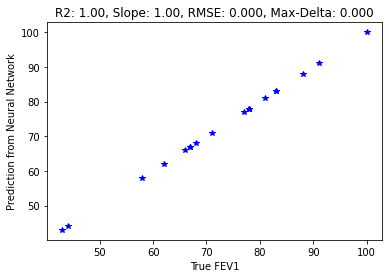

In [ ]:
y_pred = model.predict(X).reshape(-1,)

rmse = np.sqrt(mean_squared_error(y,y_pred))
max_delta = np.max(np.abs(y-y_pred))

reg = linregress(y_pred, y)
r2 = reg.rvalue**2
slope = reg.slope
offset = reg.intercept

plt.plot(y,y_pred, "*", color="blue")
plt.xlabel("True FEV1")
plt.ylabel("Prediction from Neural Network")
stats = f"R2: {r2 :.2f}, Slope: {slope :.2f}, RMSE: {rmse :.3f}, Max-Delta: {max_delta :.3f}"
plt.title(f"{stats}")
plt.show()



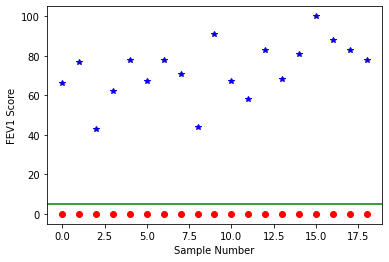

(array([], dtype=float64),
 array([], dtype=float32),
 array([], shape=(0, 5), dtype=int64))

In [ ]:
delta = np.abs(y - y_pred)
plt.plot(y, "*", color="orange", label = "True FEV1")
plt.plot(y_pred, "*", color="blue", label = "predicted")
plt.plot(delta, "o", color = "red", label = "|True FEV1 - Predicted FEV1|")
plt.xlabel("Sample Number")
plt.ylabel("FEV1 Score")
plt.axhline(5, color = "green")
#plt.legend()
plt.show()

chk_these = np.where(delta > 5)[0]
y[chk_these], y_pred[chk_these], X[chk_these]

#Aha! It looks like the #counts of the best sequences is 0 sometimes. Let's remove these from plots/training?



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


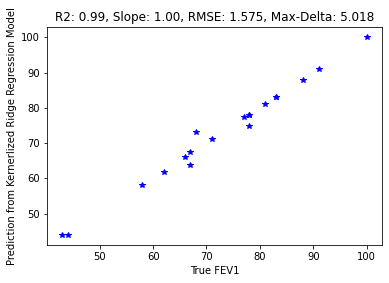

In [ ]:
#Let's try kernel ridge-regression!

from sklearn.kernel_ridge import KernelRidge

krr = KernelRidge(alpha=0.0, kernel  = "poly", degree = 2)
krr.fit(X, y)
y_pred = krr.predict(X)

rmse = np.sqrt(mean_squared_error(y,y_pred))
max_delta = np.max(np.abs(y-y_pred))

reg = linregress(y_pred, y)
r2 = reg.rvalue**2
slope = reg.slope
offset = reg.intercept

plt.plot(y,y_pred, "*", color="blue")
plt.xlabel("True FEV1")
plt.ylabel("Prediction from Kernerlized Ridge Regression Model")
stats = f"R2: {r2 :.2f}, Slope: {slope :.2f}, RMSE: {rmse :.3f}, Max-Delta: {max_delta :.3f}"
plt.title(f"{stats}")
plt.show()


In [ ]:
#for bac in bact_names:
#  plt(bac_counts, fev1)

#plt.plot(row_sum, y, "o", color = "green")
#plt.xlabel("Total counts of Significant Bacteria")
#plt.ylabel("FEV1 Score")


Text(0, 0.5, 'FEV1 Score')

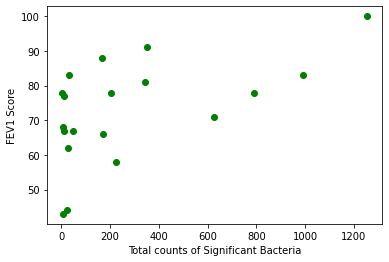

In [ ]:
plt.plot(row_sum, y, "o", color = "green")
plt.xlabel("Total counts of Significant Bacteria")
plt.ylabel("FEV1 Score")


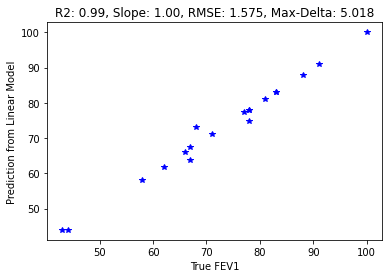

In [ ]:
keep_these = np.where(delta < 5)[0]
y = y[keep_these]
y_pred = y_pred[keep_these]

rmse = np.sqrt(mean_squared_error(y,y_pred))
max_delta = np.max(np.abs(y-y_pred))

reg = linregress(y_pred, y)
r2 = reg.rvalue**2
slope = reg.slope
offset = reg.intercept

plt.plot(y,y_pred, "*", color="blue")
plt.xlabel("True FEV1")
plt.ylabel("Prediction from Linear Model")
stats = f"R2: {r2 :.2f}, Slope: {slope :.2f}, RMSE: {rmse :.3f}, Max-Delta: {max_delta :.3f}"
plt.title(f"{stats}")
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

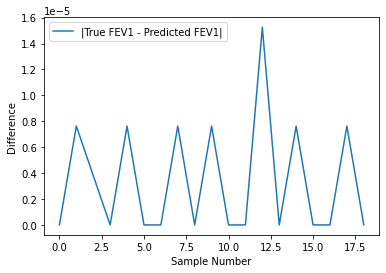

In [ ]:
#Create delta plot, analyze what is going on for poor-predicting samples:


plt.plot(delta, label = "|True FEV1 - Predicted FEV1|")
plt.xlabel("Sample Number")
plt.ylabel("Difference")
plt.legend()
plt.show

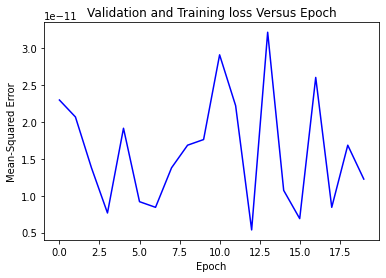

In [ ]:
#Check for overfitting and underfitting! Are you familiar with what overfitting and underfitting are? You can give me your answer to this as a yes/no in the Polygence chat.

#val_loss = history.history['val_loss']
train_loss = history.history['loss']

plt.plot(train_loss[-20:], label = "Loss on Training Set", color = "blue") #Loss is still extremely high, could be a problem. Overfitting like crazy also
#plt.plot(val_loss[-20:], label = "Loss on Validation Set", color = "orange")
plt.xlabel("Epoch")
plt.ylabel("Mean-Squared Error")
plt.title("Validation and Training loss Versus Epoch")
plt.show()

In [ ]:
for x in bacteria_names:
  print(taxonomic_data.loc[x]['genus'])

Leptotrichia
Fusobacterium
Actinomyces
Corynebacterium
Selenomonas


In [ ]:
#The correlation values, p-values and bacteria names of statistically significant bacteria/FEV1
print(corr_values)
print(pvalues)
print(bacteria_names)

[0.5348433192303289, 0.6203459931321331, 0.5769829170980344, 0.5262549262444586, 0.5228050675443686]
[0.00015371041582284406, 5.484755493682767e-06, 3.3409855558508355e-05, 0.0002047744695476323, 0.00022928938851817288]
['13507.SD200.T_57', '13507.SD239.T_13466', '13507.SD262.N_2629', '13507.SD309.T_337', '13507.SH009.T_2657']


Text(0.5, 1.0, 'Correlation of Actinomyces Bacteria Cluster with FEV1')

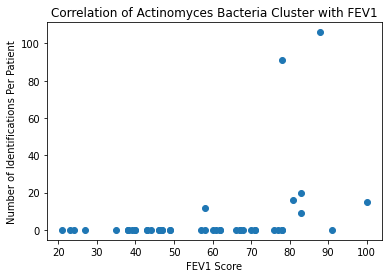

In [ ]:
#Manasvi example to get figure for her first paper!

bacteria_counts = aggregated_count_matrix.loc[bacteria_names[3]]
plt.scatter(fev1, bacteria_counts)
plt.xlabel("FEV1 Score")
plt.ylabel("Number of Identifications Per Patient")
plt.title("Correlation of Actinomyces Bacteria Cluster with FEV1")

*FEV1 Correlation with genus, family, order, class, phylum*

In [ ]:
genus_dict = dict()
for rep_seq in taxonomic_data.index:
  genus = taxonomic_data.loc[rep_seq].genus
  genus_dict[rep_seq] = genus

genus_aggregated_count_matrix = aggregated_count_matrix.groupby(genus_dict).sum()

genus_aggregated_count_matrix = genus_aggregated_count_matrix[sample_data.index]

['"Leptotrichiaceae"_unclassified']
0.0003603806964131399
"Leptotrichiaceae"_unclassified
0.5086289481903415


Text(0.5, 1.0, 'Correlation of Leptotrichiaceae Genus with FEV1')

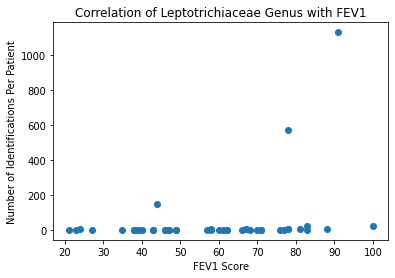

In [ ]:
fev1 = pd.to_numeric(sample_data.fev1, errors='coerce')
pvalues_genus = []
genus_names = []
corr_genus = []

for genus in genus_aggregated_count_matrix.index:
  genus_counts = genus_aggregated_count_matrix.loc[genus]
  result = stats.spearmanr(fev1, genus_counts, nan_policy='omit')
  if result.pvalue < a_level:
    pvalues_genus.append(result.pvalue)
    genus_names.append(genus)
    corr_genus.append(result.correlation)

print(genus_names)

min_index = np.argmin(pvalues_genus)
print(pvalues_genus[min_index])
print(genus_names[min_index])
print(corr_genus[min_index])

genus_counts = genus_aggregated_count_matrix.loc[genus_names[min_index]]
plt.scatter(fev1, genus_counts)
plt.xlabel("FEV1 Score")
plt.ylabel("Number of Identifications Per Patient")
plt.title("Correlation of Leptotrichiaceae Genus with FEV1")

In [ ]:
family_dict = dict()
for rep_seq in taxonomic_data.index:
  family = taxonomic_data.loc[rep_seq].family
  family_dict[rep_seq] = family

family_aggregated_count_matrix = aggregated_count_matrix.groupby(family_dict).sum()

family_aggregated_count_matrix = family_aggregated_count_matrix[sample_data.index]

['Enterobacteriaceae']
0.0003942765237458277
Enterobacteriaceae
0.5057354501800927


Text(0.5, 1.0, 'Correlation of Enterobacteriaceae Family with FEV1')

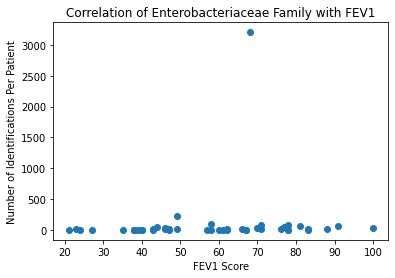

In [ ]:
fev1 = pd.to_numeric(sample_data.fev1, errors='coerce')
pvalues_family = []
family_names = []
corr_family = []

for family in family_aggregated_count_matrix.index:
  family_counts = family_aggregated_count_matrix.loc[family]
  result = stats.spearmanr(fev1, family_counts, nan_policy='omit')
  if result.pvalue < a_level:
    pvalues_family.append(result.pvalue)
    family_names.append(family)
    corr_family.append(result.correlation)

print(family_names)

min_index = np.argmin(pvalues_family)
print(pvalues_family[min_index])
print(family_names[min_index])
print(corr_family[min_index])

family_counts = family_aggregated_count_matrix.loc[family_names[min_index]]
plt.scatter(fev1, family_counts)
plt.xlabel("FEV1 Score")
plt.ylabel("Number of Identifications Per Patient")
plt.title("Correlation of Enterobacteriaceae Family with FEV1")

In [ ]:
order_dict = dict()
for rep_seq in taxonomic_data.index:
  order = taxonomic_data.loc[rep_seq].order
  order_dict[rep_seq] = order

order_aggregated_count_matrix = aggregated_count_matrix.groupby(order_dict).sum()

order_aggregated_count_matrix = order_aggregated_count_matrix[sample_data.index]

['"Enterobacteriales"']
0.0003942765237458277
"Enterobacteriales"


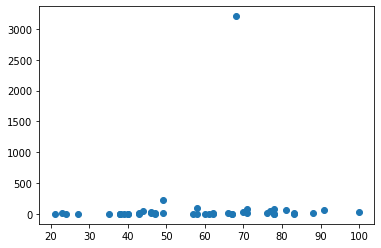

In [ ]:
fev1 = pd.to_numeric(sample_data.fev1, errors='coerce')
pvalues_order = []
order_names = []

for order in order_aggregated_count_matrix.index:
  order_counts = order_aggregated_count_matrix.loc[order]
  result = stats.spearmanr(fev1, order_counts, nan_policy='omit')
  if result.pvalue < a_level:
    pvalues_order.append(result.pvalue)
    order_names.append(order)

print(order_names)

min_index = np.argmin(pvalues_order)
print(pvalues_order[min_index])
print(order_names[min_index])

order_counts = order_aggregated_count_matrix.loc[order_names[min_index]]
plt.scatter(fev1, order_counts)

In [ ]:
clas_dict = dict()
for rep_seq in taxonomic_data.index:
  clas = taxonomic_data.loc[rep_seq].clas
  clas_dict[rep_seq] = clas

clas_aggregated_count_matrix = aggregated_count_matrix.groupby(clas_dict).sum()

clas_aggregated_count_matrix = clas_aggregated_count_matrix[sample_data.index]

In [ ]:
fev1 = pd.to_numeric(sample_data.fev1, errors='coerce')
pvalues_clas = []
clas_names = []

for clas in clas_aggregated_count_matrix.index:
  clas_counts = clas_aggregated_count_matrix.loc[clas]
  result = stats.spearmanr(fev1, clas_counts, nan_policy='omit')
  if result.pvalue < a_level:
    pvalues_clas.append(result.pvalue)
    clas_names.append(clas)

print(clas_names)

#min_index = np.argmin(pvalues_clas)
#print(pvalues_clas[min_index])
#print(clas_names[min_index])

#bacteria_counts = clas_aggregated_count_matrix.loc[clas_names[min_index]]
#plt.scatter(fev1, clas_counts)

[]


In [ ]:
phylum_dict = dict()
for rep_seq in taxonomic_data.index:
  phylum = taxonomic_data.loc[rep_seq].phylum
  phylum_dict[rep_seq] = phylum

phylum_aggregated_count_matrix = aggregated_count_matrix.groupby(phylum_dict).sum()

phylum_aggregated_count_matrix = phylum_aggregated_count_matrix[sample_data.index]

In [ ]:
fev1 = pd.to_numeric(sample_data.fev1, errors='coerce')
pvalues_phylum = []
phylum_names = []

for phylum in phylum_aggregated_count_matrix.index:
  phylum_counts = phylum_aggregated_count_matrix.loc[phylum]
  result = stats.spearmanr(fev1, phylum_counts, nan_policy='omit')
  if result.pvalue < a_level:
    pvalues_phylum.append(result.pvalue)
    phylum_names.append(phylum)

print(phylum_names)

#min_index = np.argmin(pvalues_phylum)
#print(pvalues_phylum[min_index])
#print(phylum_names[min_index])

#bacteria_counts = phylum_aggregated_count_matrix.loc[phylum_names[min_index]]
#plt.scatter(fev1, phylum_counts)

[]


Correlations with FEV1/FVC Ratio

In [ ]:
ratio_list = [0] * 51
ratio_list[0] = 'n/a'
ratio_list[1] = 'n/a'
ratio_list[2] = 'n/a'
ratio_list[-1] = 'n/a'
ratio_list[-5] = 'n/a'
ratio_list[-13] = 'n/a'
ratio_list[-19] = 'n/a'

for row in range(51):
  if ratio_list[row] != 'n/a':
    ratio_list[row] = [int(sample_data["fev1"].iloc[row])/int(sample_data["fvc"].iloc[row])]

ratio_list

sample_data["ratio"] = [0] * 51
sample_data.iloc[0] = 'n/a'
sample_data.iloc[1] = 'n/a'
sample_data.iloc[2] = 'n/a'
sample_data.iloc[-1] = 'n/a'
sample_data.iloc[-5] = 'n/a'
sample_data.iloc[-13] = 'n/a'
sample_data.iloc[-19] = 'n/a'

for row in range(51):
  if ratio_list[row] != 'n/a':
    sample_data["ratio"].iloc[row] = (float(ratio_list[row][0])) * 100

In [ ]:
ratio = pd.to_numeric(sample_data.ratio, errors='coerce')
pvalues = []
bacteria_names = []
for bact_name in aggregated_count_matrix.index:
  bacteria_counts = aggregated_count_matrix.loc[bact_name]
  result = stats.spearmanr(ratio, bacteria_counts, nan_policy='omit')
  if result.pvalue < a_level:
    pvalues.append(result.pvalue)
    bacteria_names.append(bact_name)

print(bacteria_names)

#min_index = np.argmin(pvalues)
#print(pvalues[min_index])
#print(bacteria_names[min_index])

#bacteria_counts = aggregated_count_matrix.loc[bacteria_names[min_index]]
#plt.scatter(ratio, bacteria_counts)

[]


In [ ]:
ratio = pd.to_numeric(sample_data.ratio, errors='coerce')
pvalues_genus = []
genus_names = []

for genus in genus_aggregated_count_matrix.index:
  genus_counts = genus_aggregated_count_matrix.loc[genus]
  result = stats.spearmanr(ratio, genus_counts, nan_policy='omit')
  if result.pvalue < a_level:
    pvalues_genus.append(result.pvalue)
    genus_names.append(genus)

print(genus_names)

#min_index = np.argmin(pvalues_genus)
#print(pvalues_genus[min_index])
#print(genus_names[min_index])

#bacteria_counts = genus_aggregated_count_matrix.loc[genus_names[min_index]]
#plt.scatter(ratio, genus_counts)

[]


In [ ]:
ratio = pd.to_numeric(sample_data.ratio, errors='coerce')
pvalues_family = []
family_names = []

for family in family_aggregated_count_matrix.index:
  family_counts = family_aggregated_count_matrix.loc[family]
  result = stats.spearmanr(ratio, family_counts, nan_policy='omit')
  if result.pvalue < a_level:
    pvalues_family.append(result.pvalue)
    family_names.append(family)

print(family_names)

#min_index = np.argmin(pvalues_family)
#print(pvalues_family[min_index])
#print(family_names[min_index])

#bacteria_counts = family_aggregated_count_matrix.loc[family_names[min_index]]
#plt.scatter(ratio, family_counts)

[]


In [ ]:
ratio = pd.to_numeric(sample_data.ratio, errors='coerce')
pvalues_order = []
order_names = []

for order in order_aggregated_count_matrix.index:
  order_counts = order_aggregated_count_matrix.loc[order]
  result = stats.spearmanr(ratio, order_counts, nan_policy='omit')
  if result.pvalue < a_level:
    pvalues_order.append(result.pvalue)
    order_names.append(order)

print(order_names)

#min_index = np.argmin(pvalues_order)
#print(pvalues_order[min_index])
#print(order_names[min_index])

#bacteria_counts = order_aggregated_count_matrix.loc[order_names[min_index]]
#plt.scatter(ratio, order_counts)

[]


In [ ]:
ratio = pd.to_numeric(sample_data.ratio, errors='coerce')
pvalues_clas = []
clas_names = []

for clas in clas_aggregated_count_matrix.index:
  clas_counts = clas_aggregated_count_matrix.loc[clas]
  result = stats.spearmanr(ratio, clas_counts, nan_policy='omit')
  if result.pvalue < a_level:
    pvalues_clas.append(result.pvalue)
    clas_names.append(clas)

print(clas_names)

#min_index = np.argmin(pvalues_clas)
#print(pvalues_clas[min_index])
#print(clas_names[min_index])

#bacteria_counts = clas_aggregated_count_matrix.loc[clas_names[min_index]]
#plt.scatter(ratio, clas_counts)

[]


In [ ]:
ratio = pd.to_numeric(sample_data.ratio, errors='coerce')
pvalues_phylum = []
phylum_names = []

for phylum in phylum_aggregated_count_matrix.index:
  phylum_counts = phylum_aggregated_count_matrix.loc[phylum]
  result = stats.spearmanr(ratio, phylum_counts, nan_policy='omit')
  if result.pvalue < a_level:
    pvalues_phylum.append(result.pvalue)
    phylum_names.append(phylum)

print(phylum_names)

#min_index = np.argmin(pvalues_phylum)
#print(pvalues_phylum[min_index])
#print(phylum_names[min_index])

#bacteria_counts = phylum_aggregated_count_matrix.loc[phylum_names[min_index]]
#plt.scatter(ratio, phylum_counts)

[]
